# Naural Networks

## Załadowanie i przygotowanie danych

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import keras
import tensorflow
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

Wstępne załadowanie i eskploracja oryginalnych danych.

In [2]:
chess = pd.read_csv("Data/games.csv")
chess = chess.loc[:9999, :]
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Zakodowanie godzin na dane z zakresu (0, 1)

https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

In [3]:
hoursAfterMidnight = (chess.loc[:, 'created_at']/1000).apply(datetime.fromtimestamp).dt.hour
chess['sin_created_at'] = np.sin(2*np.pi*hoursAfterMidnight/24)
chess['cos_created_at'] = np.cos(2*np.pi*hoursAfterMidnight/24)

In [4]:
hoursAfterMidnight

0       22
1       23
2       23
3       18
4       20
        ..
9995    14
9996    12
9997    10
9998    10
9999     9
Name: created_at, Length: 10000, dtype: int64

Usunięcie niepotrzebnych kolumn.

In [5]:
chess.drop(columns=['created_at', 'last_move_at', 'victory_status', 'white_id', 'moves', 'black_id', 'opening_name', 'id'], inplace=True)
chess.head()

,rated,turns,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,sin_created_at,cos_created_at
0,False,13,white,15+2,1500,1191,D10,5,-0.500000,8.660254e-01
1,True,16,black,5+10,1322,1261,B00,4,-0.258819,9.659258e-01
2,True,61,white,5+10,1496,1500,C20,3,-0.258819,9.659258e-01
3,True,61,white,20+0,1439,1454,D02,3,-1.000000,-1.836970e-16
4,True,95,white,30+3,1523,1469,C41,5,-0.866025,5.000000e-01


Przedstawienie na wykresie liczby wygranych białych, czarnych oraz remisów

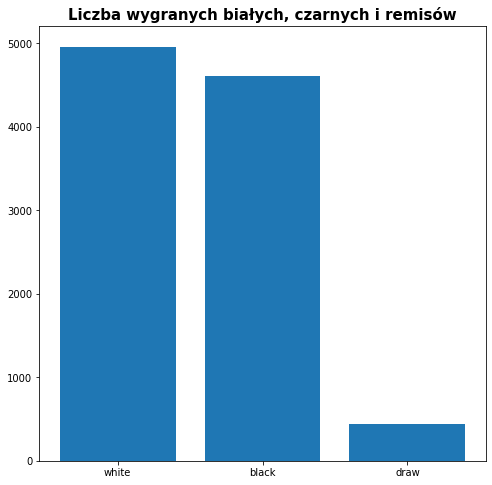

In [6]:
labels = chess.loc[:, "winner"].value_counts().index
values = chess.loc[:, "winner"].value_counts().values
plt.figure(figsize=(8, 8))
plt.bar(labels, values, align="center")
plt.title("Liczba wygranych białych, czarnych i remisów", fontdict={"fontweight": "bold", "size": 15})
plt.show()

Zamiana kolumny rated z Boolen na zero-jedynkową i zakodowanie wartości kategorycznych

In [7]:
chess.loc[:, 'rated'] = chess.loc[:, 'rated']*1
temp = pd.get_dummies(chess.loc[:, ['increment_code', 'winner', 'opening_eco']])
chess.drop(columns=['increment_code', 'winner', 'opening_eco'], inplace=True)
chess = pd.concat([chess, temp], axis=1)
chess.replace({np.nan, 0})

,rated,turns,white_rating,black_rating,opening_ply,sin_created_at,cos_created_at,increment_code_0+12,increment_code_0+15,increment_code_0+16,...,opening_eco_E71,opening_eco_E73,opening_eco_E76,opening_eco_E77,opening_eco_E80,opening_eco_E81,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94
0,0,13,1500,1191,5,-5.000000e-01,8.660254e-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,16,1322,1261,4,-2.588190e-01,9.659258e-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,61,1496,1500,3,-2.588190e-01,9.659258e-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,61,1439,1454,3,-1.000000e+00,-1.836970e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,95,1523,1469,5,-8.660254e-01,5.000000e-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,63,1195,1369,5,-5.000000e-01,-8.660254e-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,95,1195,1369,3,1.224647e-16,-1.000000e+00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,76,1195,1247,6,5.000000e-01,-8.660254e-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,1,40,1369,1062,4,5.000000e-01,-8.660254e-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 637 entries, rated to opening_eco_E94
dtypes: float64(2), int64(5), uint8(630)
memory usage: 6.5 MB


## Tworzenie modelu

Artykuł o tworzeniu modelu: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

## Próba przewidzenie czy wygra biały, czarny czy spotkanie zakończy się remisem

Podział na zmienne objąśniające i objaśnianą, oraz podział na zbiór uczący i testowy w stosunku 80/20

In [20]:
X = chess.drop(columns=['winner_black',	'winner_draw', 'winner_white'])
y = chess.loc[:, ['winner_black',	'winner_draw', 'winner_white']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Tworzenie początkowego modelu z jedną warstwą wejściową, jedną ukrytą, oraz jedną wyjściową. Tworzony model będzie typu Sekwencyjnego, czyli do modelu dodajemy kolejne warstwy neuronowe, z wybranymi przez nasa parametrami.

Dense Layer: https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/

Cross_entropy: https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy

In [11]:
model = Sequential()
model.add(Dense(units=16, input_dim=634, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

2022-05-26 09:32:53.781565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Optymalizacja modelu do uczenia przy uzyciu adaptującego optymalizera Adam

In [12]:
opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

Fitowanie modelu

In [13]:
batch1000 = model.fit(X_train, y_train, epochs=100, batch_size=1000, use_multiprocessing=True)

Epoch 1/100
8/8 [==============================] - 1s 9ms/step - loss: 79.2030 - categorical_accuracy: 0.3801
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 40.4953 - categorical_accuracy: 0.3532
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 14.4902 - categorical_accuracy: 0.4779
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3202 - categorical_accuracy: 0.3274
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 2.2895 - categorical_accuracy: 0.4506
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 1.8547 - categorical_accuracy: 0.4825
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 1.5912 - categorical_accuracy: 0.5000
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4274 - categorical_accuracy: 0.5058
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 1.2363 - categorical_accuracy: 0.4969
Epoch 10/100
8

Przedstawienie accuracy dla kazdego ze 100 epchów na wykresie liniowym

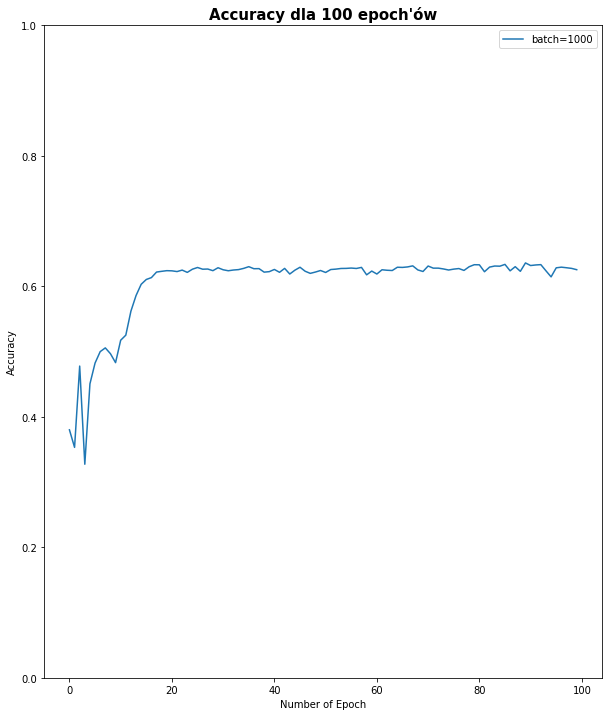

In [14]:
plt.figure(figsize=(10, 12))
plt.title("Accuracy dla 100 epoch'ów", fontdict={"fontweight": "bold", "size": 15})
plt.ylabel("Accuracy")
plt.xlabel("Number of Epoch")
plt.ylim(0, 1)
plt.plot(batch1000.history['categorical_accuracy'], label="batch=1000")
plt.legend()

Artykuł o optymalizacji: https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

Funkcja straty: https://www.brutalk.com/pl/wiadomosci/brutalk-blog/przeglad/funkcje-strat-i-strat-do-szkolenia-sieci-neuronowych-uczenia-glebokiego-6046fa42120e8

Artykuł o funkcjach aktywacyjnych: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

Categorical accuracy: https://towardsdatascience.com/keras-accuracy-metrics-8572eb479ec7

### model evaluation

In [15]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.7457 - categorical_accuracy: 0.6335


[0.7457355856895447, 0.6334999799728394]

## Próba przewidzenie czy wygra biały


In [50]:
yWhite = y.loc[:, 'winner_white']
X_train, X_test, y_train, y_test = train_test_split(X, yWhite, test_size=0.2)

In [51]:
model = Sequential()
model.add(Dense(units=16, input_dim=634, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

In [52]:
opt = keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy'])

In [53]:
batch1000 = model.fit(X_train, y_train, epochs=100, batch_size=1000, use_multiprocessing=True)

Epoch 1/100
8/8 [==============================] - 0s 6ms/step - loss: 5.1201 - binary_accuracy: 0.4959
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 3.0035 - binary_accuracy: 0.4959
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.8176 - binary_accuracy: 0.4959
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 1.1313 - binary_accuracy: 0.4959
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8364 - binary_accuracy: 0.4959
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7356 - binary_accuracy: 0.4959
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6838 - binary_accuracy: 0.4959
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6573 - binary_accuracy: 0.4959
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6418 - binary_accuracy: 0.4959
Epoch 10/100
8/8 [==============================] - 0s 7ms/step 

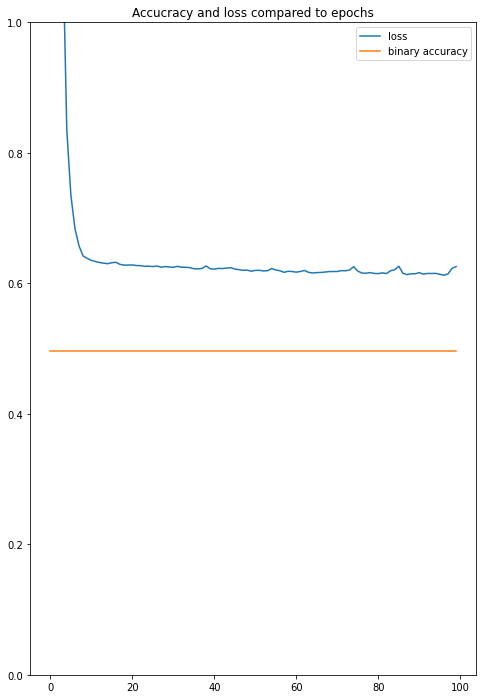

In [54]:
plt.figure(figsize=(8,12))
plt.plot(batch1000.history['loss'], label="loss")
plt.plot(batch1000.history['binary_accuracy'], label="binary accuracy")
plt.title("Accucracy and loss compared to epochs")
plt.ylim(0, 1)
plt.legend()

In [49]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.6309 - binary_accuracy: 0.4965


[0.6309099197387695, 0.4964999854564667]

Wynik gorszy od początkowego modelu

## Skuteczność modelu w zależności od liczby warstw neuronów i zmian hiperparametrów

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [70]:
model = Sequential()
model.add(Dense(units=16, input_dim=634, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['categorical_accuracy'])

In [71]:
params= {"epochs": range(10, 100, 20), "batch_size": [100, 200, 500, 1000, 2000]}
scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
        }
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring=scorers, refit="precision_score")

In [72]:
grid_result = grid.fit(X_train, y_train)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x7fa9a608c160>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.